# Pre-procesado de datos.

En este documento analizaremos los datos antes de entrenarlos.

Importamos las liber√≠as empleadas en este an√°lisis.

In [31]:
# Importamos las librerias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Importamos nuestros datos.

In [32]:
# Creamos un DataFrame de nuestros datos.
car_data = pd.read_csv('../data/cars.csv', sep=';')

# Mostramos la forma y los primeros registros de nuestro DataFrame.
print(car_data.shape)
car_data.head()

(58049, 25)


CODE PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia_ TRANS  \
0  CLI1        A           TIPO1      FUEL 1      Baja     M   
1  CLI2        A           TIPO1      FUEL 1      Baja     M   
2  CLI3        A           TIPO1      FUEL 1      Baja     M   
3  CLI4        A           TIPO1      FUEL 1      Baja     M   
4  CLI5        A           TIPO1      FUEL 1      Baja     M   

         FORMA_PAGO ESTADO_CIVIL GENERO    OcupaciOn  ... REV_Garantia  \
0           Contado       CASADO      M      Empresa  ...      NO DATA   
1           Contado       CASADO      F      Empresa  ...           SI   
2             Otros       CASADO      M      Empresa  ...      NO DATA   
3  Financiera Marca       CASADO      F      Empresa  ...           SI   
4  Financiera Marca       CASADO      F  Funcionario  ...      NO DATA   

       Averia_grave QUEJA_CAC EDAD_COCHE COSTE_VENTA km_anno Mas_1_coche  \
0  Averia muy grave        SI       2.08        2892       0           0   
1                No        NO       2.45        1376    7187           0   
2                No        NO       2.51        1376       0           1   
3  Averia muy grave        SI       2.43        2015    7256           1   
4                No        NO       2.30        1818       0           1   

  Revisiones  Edad Cliente  Tiempo  
0          2            18       0  
1          2            53       0  
2          4            21       3  
3          4            48       5  
4          3            21       3  

[5 rows x 25 columns]

Vemos qu√© valores nulos hay en nuestro DataFrame.

In [33]:
# Revisamos si hay valores nulos en nuestro DataFrame.
valores_nulos = car_data.isnull().sum()

# Mostramos los valores nulos.
valores_nulos

CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia_              0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona _Renta        13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad Cliente           0
Tiempo                 0
dtype: int64

Debido a que las columnas con datos nulos son categ√≥ricas y pueden tomar tan solo ciertos valores, sustituimos los valores nulos por la moda.

In [34]:
# Sustituir valores nulos por la moda (valor m√°s frecuente)
car_data['ESTADO_CIVIL'].fillna(car_data['ESTADO_CIVIL'].mode()[0], inplace=True)
car_data['GENERO'].fillna(car_data['GENERO'].mode()[0], inplace=True)
car_data['Zona _Renta'].fillna(car_data['Zona _Renta'].mode()[0], inplace=True)
car_data['Averia_grave'].fillna(car_data['Averia_grave'].mode()[0], inplace=True)

Verificamos que se hayan hecho los cambios correctamente.

In [35]:
# Calculamos de nuevo los valores nulos en nuestro DataFrame.
valores_nulos = car_data.isnull().sum()

# Mostramos los valores nulos.
valores_nulos

CODE               0
PRODUCTO           0
TIPO_CARROCERIA    0
COMBUSTIBLE        0
Potencia_          0
TRANS              0
FORMA_PAGO         0
ESTADO_CIVIL       0
GENERO             0
OcupaciOn          0
PROVINCIA          0
Campanna1          0
Campanna2          0
Campanna3          0
Zona _Renta        0
REV_Garantia       0
Averia_grave       0
QUEJA_CAC          0
EDAD_COCHE         0
COSTE_VENTA        0
km_anno            0
Mas_1_coche        0
Revisiones         0
Edad Cliente       0
Tiempo             0
dtype: int64

Ya no tenemos ning√∫n dato nulo.

Vemos si hay datos duplicados., pues es un paso crucial para garantizar la calidad de los datos y evitar sesgos, errores en los resultados estad√≠sticos, y problemas en los modelos predictivos. 

In [36]:
# Revisamos si hay valores duplicados en nuestro DataFrame.
duplicados = car_data.duplicated().sum()

# Mostramos los valores duplicados.
duplicados

0

Revisamos qu√© tipos de datos tiene cada columna de nuestro DataFrame.

In [37]:
# Revisamos los tipos de datos de nuestro DataFrame.
tipos_de_datos = car_data.dtypes

# Mostramos los tipos de datos.
tipos_de_datos

CODE                object
PRODUCTO            object
TIPO_CARROCERIA     object
COMBUSTIBLE         object
Potencia_           object
TRANS               object
FORMA_PAGO          object
ESTADO_CIVIL        object
GENERO              object
OcupaciOn           object
PROVINCIA           object
Campanna1           object
Campanna2           object
Campanna3           object
Zona _Renta         object
REV_Garantia        object
Averia_grave        object
QUEJA_CAC           object
EDAD_COCHE         float64
COSTE_VENTA          int64
km_anno              int64
Mas_1_coche          int64
Revisiones           int64
Edad Cliente         int64
Tiempo               int64
dtype: object

Para continuar con nuestro an√°lisis separamos en variables categ√≥ricas y variables num√©ricas.

In [38]:
# Separamos las variables categ√≥ricas y num√©ricas.
categorical = car_data.select_dtypes(include=['object'])
numeric = car_data.select_dtypes(exclude=['object']) # Excluimos las variables categ√≥ricas ya que sabemos que el resto de las variables son num√©ricas.

## An√°lisis varables num√©ricas.

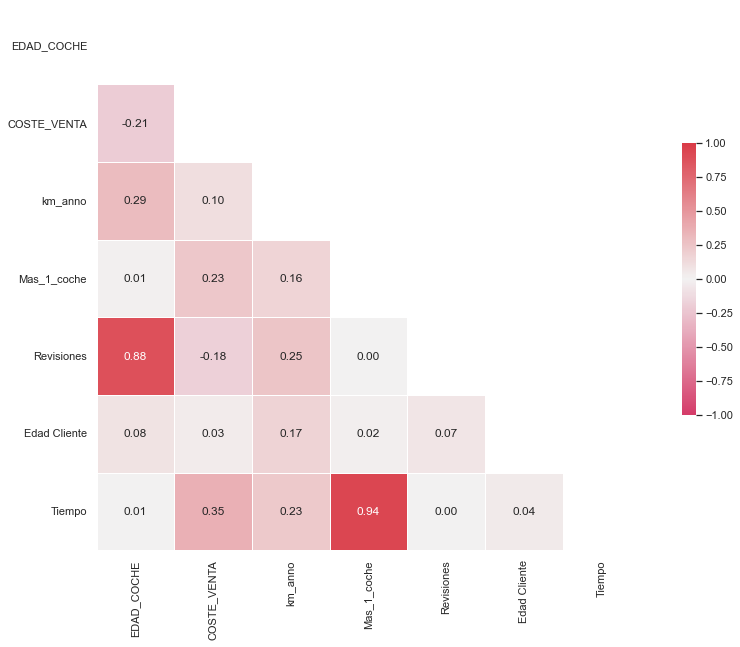

In [39]:
# Calcular la matriz de correlaci√≥n
correlation_matrix = numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.set(style='white')

# Crear la m√°scara para el tri√°ngulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el mapa de calor con los valores de correlaci√≥n anotados
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(correlation_matrix, 
            mask=mask, 
            cmap=cmap, 
            annot=True,  # Mostrar los n√∫meros
            fmt=".2f",  # Formato de los n√∫meros a dos decimales
            vmin=-1, vmax=1, center=0, 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.5})

# Mostrar el gr√°fico
plt.show()

Podemos eliminar la variable `EDAD_COCHE` ya que las √∫nicas correlaciones altas que tiene es con el n√∫mero de revisiones y los kil√≥metros por a√±o, lo cual es de sentido com√∫n, pues cuanto m√°s a√±os tiene un coche, m√°s revisiones y kil√≥metros tiene.

Tambi√©n eliminamos la variable `Tiempo`.

In [40]:
# Eliminamos las columnas 'EDAD_COCHE' y 'Tiempo' del DataFrame.
car_data = car_data.drop(['EDAD_COCHE', 'Tiempo'], axis=1)

# Tambi√©n eliminamos las columnas 'EDAD_COCHE' y 'Tiempo' de la lista de variables num√©ricas.
numeric = numeric.drop(['EDAD_COCHE', 'Tiempo'], axis=1)

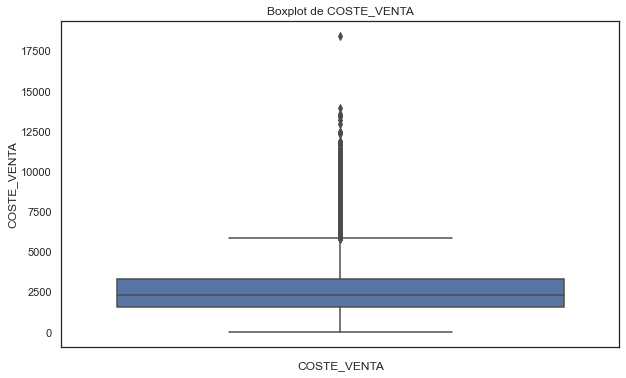

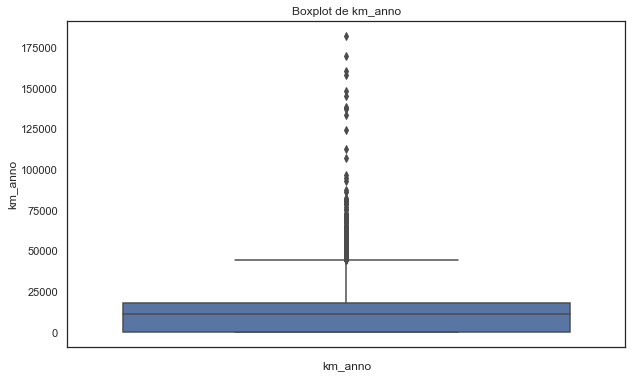

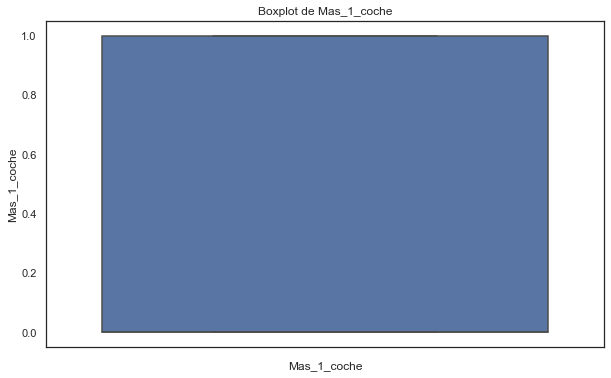

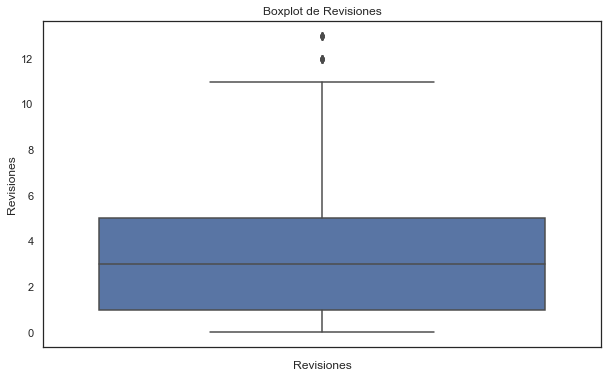

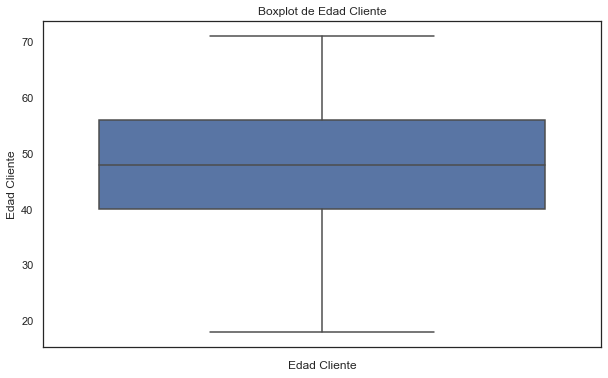

In [41]:
# Crear un boxplot individual para cada columna num√©rica.
for column in numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=numeric[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()

*EDAD_COCHE*. Esta gr√°fica nos indica que la mayor√≠a de los coches tiene entre 4 y 8 a√±os de antig√ºedad, con una mediana de 6 a√±os, y el rango total de edades oscila entre 1 y 10 a√±os. No se observan datos at√≠picos o extremos en este boxplot.


*COSTE_VENTA*.

El rango intercuartilico se encuentra alrededor de 2,500 en t√©rminos de COSTE_VENTA, lo que sugiere que el 50% de los datos est√° concentrado en ese rango, posiblemente entre unos 2,000 y 3,000. La l√≠nea dentro de la caja marca la mediana del coste de venta, que est√° alrededor de los 2,500. Esto indica que la mitad de los datos tiene un coste de venta inferior a ese valor, y la otra mitad superior. Los bigotes se extienden hacia abajo y hacia arriba, lo que indica el rango de los valores que no son at√≠picos. En este caso, el bigote superior termina alrededor de 5,000, lo que sugiere que los valores por encima de esa cifra empiezan a considerarse at√≠picos o outliers. Hay muchos puntos por encima del bigote superior, lo que indica valores at√≠picos. Estos puntos representan coches cuyo coste es significativamente m√°s alto que el resto. El valor m√°s extremo parece estar cerca de 17,500, lo que indica que hay coches con un coste de venta muy alto en comparaci√≥n con la mayor√≠a. La dispersi√≥n de los datos es notable. Mientras que la mayor√≠a de los valores se encuentran en un rango estrecho cerca de los 2,500, hay una cantidad considerable de valores at√≠picos por encima de los 5,000, lo que sugiere una gran variabilidad en los costes de venta, especialmente en el extremo superior.

Posibles soluciones:

(Eliminar outliers si son errores o irrelevantes.

Transformar los datos (log, ra√≠z) para reducir el efecto de los outliers.

Agrupar en categor√≠as si no necesitas tanta precisi√≥n en los valores.

Usar modelos robustos que manejen outliers de forma natural xgboost, random forest.)




*KM_ANNO*

Parece que la mayor√≠a de los coches tienen un kilometraje anual entre 0 y algo por encima de 25,000 km al a√±o. Esto sugiere que la mayor√≠a de los veh√≠culos no recorren distancias excesivamente largas en un a√±o. La mediana parece estar alrededor de 15,000 km/a√±o. Esto indica que la mitad de los coches recorren menos de este kilometraje anualmente, y la otra mitad recorre m√°s. El bigote superior se extiende hasta un valor cercano a 30,000 km/a√±o, lo que significa que este es el valor m√°s alto considerado "normal" para el kilometraje anual de un coche. Existen muchos outliers por encima del bigote superior, algunos incluso muy alejados, lo que indica que hay coches que recorren un kilometraje anual extremadamente alto. El valor m√°s extremo parece estar por encima de 175,000 km/a√±o, lo cual es bastante inusual y sugiere que algunos veh√≠culos recorren distancias considerablemente largas. La mayor√≠a de los veh√≠culos tienen un kilometraje anual concentrado en un rango relativamente bajo, pero hay una gran cantidad de valores at√≠picos, lo que muestra una alta dispersi√≥n en los extremos, especialmente hacia valores muy elevados de kil√≥metros recorridos al a√±o.



*MAS_1_COCHE*  Es booleano as√≠ que no vale.


*REVISIONES*  La mayor√≠a de los datos de "Revisiones" est√° concentrada entre 2 y 6, con una mediana de 4. Existen algunos valores inusualmente altos (12 y 13), que son considerados outliers en este conjunto de datos.


*EDAD CLIENTE*  La mayor√≠a de las edades de los clientes est√°n entre 40 y 60 a√±os. La l√≠nea horizontal dentro de la caja indica la mediana, que parece estar cerca de 50 a√±os. Esto significa que el 50% de los clientes tiene menos de 50 a√±os y el otro 50% m√°s de 50 a√±os. Los bigotes muestran el rango de valores que no son considerados at√≠picos. El bigote inferior llega hasta cerca de 20 a√±os, lo que indica que el cliente m√°s joven est√° en esa edad. El bigote superior llega hasta alrededor de 70 a√±os, lo que indica la edad del cliente m√°s mayor dentro del rango normal. En este gr√°fico no hay puntos fuera de los bigotes, lo que indica que no hay valores at√≠picos (outliers) detectados en los datos. Los clientes tienen edades entre 20 y 70 a√±os de forma bastante consistente.

## An√°lisis variables categ√≥ricas.

Pasamos a num√©ricos las columnas que son de tipo object usando onehot encoder.

In [42]:
# Almacenar las columnas categ√≥ricas en una variable
cols_categoricas = car_data.select_dtypes(include=['object']).columns

# Mostrar los valores √∫nicos de las columnas categ√≥ricas
for col in cols_categoricas:
    print(f"Valores √∫nicos en la columna '{col}':")
    print(car_data[col].unique())
    print()  # Salto de l√≠nea para mejor visualizaci√≥n

Valores √∫nicos en la columna 'CODE':
['CLI1' 'CLI2' 'CLI3' ... 'CLI57952' 'CLI58038' 'CLI58048']

Valores √∫nicos en la columna 'PRODUCTO':
['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']

Valores √∫nicos en la columna 'TIPO_CARROCERIA':
['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']

Valores √∫nicos en la columna 'COMBUSTIBLE':
['FUEL 1' 'FUEL 2']

Valores √∫nicos en la columna 'Potencia_':
['Baja' 'Media' 'Alta']

Valores √∫nicos en la columna 'TRANS':
['M' 'A']

Valores √∫nicos en la columna 'FORMA_PAGO':
['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']

Valores √∫nicos en la columna 'ESTADO_CIVIL':
['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA']

Valores √∫nicos en la columna 'GENERO':
['M' 'F']

Valores √∫nicos en la columna 'OcupaciOn':
['Empresa' 'Funcionario' 'Autonomo']

Valores √∫nicos en la columna 'PROVINCIA':
['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castello

In [43]:
#Eliminamos las columnas

car_data = car_data.drop('CODE', axis=1)

car_data


PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia_ TRANS        FORMA_PAGO  \
0            A           TIPO1      FUEL 1      Baja     M           Contado   
1            A           TIPO1      FUEL 1      Baja     M           Contado   
2            A           TIPO1      FUEL 1      Baja     M             Otros   
3            A           TIPO1      FUEL 1      Baja     M  Financiera Marca   
4            A           TIPO1      FUEL 1      Baja     M  Financiera Marca   
...        ...             ...         ...       ...   ...               ...   
58044        F           TIPO3      FUEL 1      Alta     M           Contado   
58045        K           TIPO7      FUEL 1      Alta     A           Contado   
58046        K           TIPO7      FUEL 1      Alta     A           Contado   
58047        G           TIPO5      FUEL 2     Media     M           Contado   
58048        G           TIPO5      FUEL 2     Media     M           Contado   

      ESTADO_CIVIL GENERO    OcupaciOn               PROVINCIA  ... Campanna3  \
0           CASADO      M      Empresa                Asturias  ...        NO   
1           CASADO      F      Empresa                  Toledo  ...        NO   
2           CASADO      M      Empresa                  Lerida  ...        NO   
3           CASADO      F      Empresa                  Madrid  ...        NO   
4           CASADO      F  Funcionario  Santa Cruz de Tenerife  ...        SI   
...            ...    ...          ...                     ...  ...       ...   
58044      SOLTERO      F      Empresa                  Madrid  ...        NO   
58045       CASADO      M      Empresa                Alicante  ...        NO   
58046       CASADO      M      Empresa                  Madrid  ...        NO   
58047       CASADO      M      Empresa                Zaragoza  ...        NO   
58048        OTROS      M      Empresa                  Teruel  ...        NO   

      Zona _Renta REV_Garantia      Averia_grave QUEJA_CAC COSTE_VENTA  \
0      Medio-Bajo      NO DATA  Averia muy grave        SI        2892   
1      Medio-Bajo           SI                No        NO        1376   
2           Medio      NO DATA                No        NO        1376   
3           Medio           SI  Averia muy grave        SI        2015   
4            Alto      NO DATA                No        NO        1818   
...           ...          ...               ...       ...         ...   
58044        Alto           SI  Averia muy grave        SI        6832   
58045  Medio-Bajo      NO DATA                No        SI           0   
58046       Medio      NO DATA                No        NO           0   
58047  Medio-Bajo      NO DATA                No        NO        2786   
58048        Alto           SI  Averia muy grave        SI        3514   

      km_anno  Mas_1_coche  Revisiones  Edad Cliente  
0           0            0           2            18  
1        7187            0           2            53  
2           0            1           4            21  
3        7256            1           4            48  
4           0            1           3            21  
...       ...          ...         ...           ...  
58044   12528            0           5            38  
58045   22072            0           3            54  
58046    8352            0           8            63  
58047   10441            0          13            62  
58048   17859            0          10            54  

[58049 rows x 22 columns]

In [44]:

# Crear un diccionario para almacenar los mapeos de cada columna
mappings = {}

# Lista de columnas que usaremos con LabelEncoder (con pocas categor√≠as)
cols_labelencoder = ['Potencia_', 'Zona _Renta', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 
                     'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 
                     'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 
                     'QUEJA_CAC', 'Averia_grave']

# Aplicar LabelEncoder a cada columna en cols_labelencoder
for col in cols_labelencoder:
    le = LabelEncoder().fit(car_data[col])
    car_data[col] = le.transform(car_data[col].astype(str))  # Convertir valores a string para manejar NaNs
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Mostrar los diccionarios de mapeo para cada columna
for col in cols_labelencoder:
    print(f"Mapeo de '{col}':", mappings[col])


Mapeo de 'Potencia_': {'Alta': 0, 'Baja': 1, 'Media': 2}
Mapeo de 'Zona _Renta': {'Alto': 0, 'Medio': 1, 'Medio-Bajo': 2, 'Otros': 3}
Mapeo de 'PRODUCTO': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10}
Mapeo de 'TIPO_CARROCERIA': {'TIPO1': 0, 'TIPO2': 1, 'TIPO3': 2, 'TIPO4': 3, 'TIPO5': 4, 'TIPO6': 5, 'TIPO7': 6, 'TIPO8': 7}
Mapeo de 'COMBUSTIBLE': {'FUEL 1': 0, 'FUEL 2': 1}
Mapeo de 'TRANS': {'A': 0, 'M': 1}
Mapeo de 'FORMA_PAGO': {'Contado': 0, 'Financiera Banco': 1, 'Financiera Marca': 2, 'Otros': 3}
Mapeo de 'ESTADO_CIVIL': {'CASADO': 0, 'EN PAREJA': 1, 'OTROS': 2, 'SOLTERO': 3}
Mapeo de 'GENERO': {'F': 0, 'M': 1}
Mapeo de 'OcupaciOn': {'Autonomo': 0, 'Empresa': 1, 'Funcionario': 2}
Mapeo de 'Campanna1': {'NO': 0, 'SI': 1}
Mapeo de 'Campanna2': {'NO': 0, 'SI': 1}
Mapeo de 'Campanna3': {'NO': 0, 'SI': 1}
Mapeo de 'REV_Garantia': {'NO DATA': 0, 'SI': 1}
Mapeo de 'QUEJA_CAC': {'NO': 0, 'SI': 1}
Mapeo de 'Averia_grave': {'Averia grave': 0, 'Av

Identificamos putliers de 2 maneras: IQR y Z-score.

M√©todo IQR: Los valores fuera del rango [ùëÑ1 ‚àí 1.5 √ó ùêºùëÑùëÖ, ùëÑ3 + 1.5 √ó ùêºùëÑùëÖ] se consideran outliers.
M√©todo Z-score: Los valores con un z-score absoluto mayor a 3 se consideran outliers (a m√°s de 3 desviaciones est√°ndar de la media).

In [45]:
# Calcular el IQR para identificar outliers
Q1 = car_data.quantile(0.25)  # Primer cuartil (25%)
Q3 = car_data.quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1           # Rango intercuart√≠lico

# Definir los l√≠mites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontrar los outliers
outliers = (car_data < lower_bound) | (car_data > upper_bound)

# Mostrar las filas que contienen outliers
print(car_data[outliers.any(axis=1)])

       PRODUCTO  TIPO_CARROCERIA  COMBUSTIBLE  Potencia_  TRANS  FORMA_PAGO  \
4             0                0            0          1      1           2   
10            0                0            0          1      1           2   
12            0                0            0          1      1           3   
13            0                0            0          1      1           3   
14            0                0            0          1      1           0   
...         ...              ...          ...        ...    ...         ...   
58044         5                2            0          0      1           0   
58045        10                6            0          0      0           0   
58046        10                6            0          0      0           0   
58047         6                4            1          2      1           0   
58048         6                4            1          2      1           0   

       ESTADO_CIVIL  GENERO  OcupaciOn             

C:\Users\Laura Rodr√≠guez\AppData\Local\Temp\ipykernel_22104\2927218837.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (car_data < lower_bound) | (car_data > upper_bound)


In [46]:
# Calcular los z-scores
z_scores = stats.zscore(car_data)

# Identificar los outliers (z-score > 3 o z-score < -3)
outliers_z = (abs(z_scores) > 3)

# Mostrar las filas que contienen outliers
print(car_data[outliers_z.any(axis=1)])

TypeError: unsupported operand type(s) for /: 'str' and 'int'